# Публикация Django Проекта

__Публикация проекта__ представляет собой процесс размещения вашего веб-приложения на сервере, чтобы оно стало доступно пользователям в интернете. Публикация — это финальный шаг, который позволяет проекту "ожить" и начать свою работу в реальном мире.

## WSGI

__WSGI (Web Server Gateway Interface)__ — протокол взаимодействия между Python-программой, выполняющейся на стороне сервера, и самим веб-сервером. Это стандартный интерфейс, который был разработан для того, чтобы обеспечить универсальную связь между серверами и приложениями.<br></br>
__WSGI__ действует как прослойка между веб-приложением (например, написанным на __Django__) и веб-сервером (например, __Nginx__ или __Apache__).<br></br>
Благодаря __WSGI__, разработчики могут создавать приложения, которые будут совместимы с любыми веб-серверами, поддерживающими __WSGI__, что обеспечивает гибкость в выборе и переключении серверов.<br></br>

__WSGI-серверы__ реализуют интерфейс __WSGI__ и могут служить для размещения веб-приложений. Например, __Gunicorn__ и __uWSGI__ – популярные WSGI-серверы, часто используемые с __Django__.

### Gunicorn (Green Unicorn)

__Gunicorn__ - это __WSGI-сервер__ для UNIX, широко используемый в сообществе Django и Flask. Он является простым, быстрым и легким способом развертывания Python-приложений.

   * Gunicorn взаимодействует с веб-приложениями через WSGI-интерфейс. Он использует префорк-рабочую модель, запуская несколько рабочих процессов для обработки запросов.
   * Отличается простотой настройки и не требует сложной конфигурации.
   * Особенно подходит для развертывания стандартных веб-приложений и API.

### uWSGI

__uWSGI__ - это полнофункциональный сервер приложений для Python, который также реализует __WSGI-интерфейс__. Он предлагает больше функций по сравнению с __Gunicorn__ и используется для выполнения Python-приложений.

   * Поддерживает различные протоколы и имеет свой собственный uwsgi протокол, который часто используется с __Nginx__.
   * Предоставляет больше возможностей для настройки и оптимизации производительности.
   * Более сложен в настройке по сравнению с __Gunicorn__, но предлагает дополнительную гибкость и функции.

## ASGI

__ASGI (Asynchronous Server Gateway Interface)__ – это эволюция WSGI, поддерживающая асинхронную обработку. Это позволяет использовать асинхронные фреймворки Python и улучшить производительность приложений, особенно для долгосрочных соединений, таких как __WebSocket__.<br></br>
__ASGI__ поддерживает __как асинхронные, так и синхронные приложения__, делая его более универсальным по сравнению с __WSGI__.

__ASGI-серверы__ способны обрабатывать асинхронные запросы через __ASGI__. Примеры включают __Daphne__, __Uvicorn__ и __Hypercorn__. Они часто используются для работы с __Django Channels__, который позволяет реализовывать функции, такие как чаты или уведомления в реальном времени.

### Daphne

__Daphne__ - это __ASGI-сервер__, разработанный как часть проекта __Django Channels__. Он подходит для обработки асинхронных протоколов, таких как WebSockets, в дополнение к традиционным HTTP-запросам.

   * __Daphne__ был одним из первых серверов, поддерживающих __ASGI__, и может обрабатывать асинхронные и синхронные запросы.
   * Рекомендуется использовать с __Django Channels__ для приложений, которым требуется взаимодействие в реальном времени.

### Uvicorn

__Uvicorn__ - это быстрый __ASGI-сервер__, реализованный на Python. Он известен своей скоростью и простотой.

   * Один из самых быстрых __ASGI-серверов__, благодаря использованию __uvloop__ и __httptools__.
   * __Uvicorn__ легко настраивается и использует меньше ресурсов.
   * Подходит для асинхронных Python-фреймворков, таких как __Starlette__ или __FastAPI__.

### Hypercorn

__Hypercorn__ - это __ASGI-сервер__, поддерживающий __HTTP/2__ и разработанный с упором на совместимость с ASGI-спецификацией.

   * Одно из ключевых преимуществ __Hypercorn__ заключается в его способности обрабатывать __HTTP/2__ запросы.
   * Совместим с любыми ASGI-фреймворками и приложениями.
   * Предоставляет широкие возможности настройки и поддерживает автоматическое переключение между __HTTP/1__ и __HTTP/2__.

## Django и WSGI/ASGI

До версии __Django 3.0__, Django поддерживал только __WSGI__ для обработки запросов. Это означает, что Django-приложения могли работать на любом WSGI-совместимом сервере. <br></br>
С версии __Django 3.0 и выше__, Django начал поддерживать и __ASGI__, что позволило использовать асинхронные функции Python в Django-приложениях.

Выбор между __WSGI__ и __ASGI__ зависит от требований проекта. Для традиционных синхронных веб-приложений __WSGI__ по-прежнему является надежным выбором. Для приложений, требующих асинхронной обработки (например, для работы с WebSockets), __ASGI__ предлагает дополнительные преимущества.

## Nginx

__Nginx__ — это __HTTP-сервер__, обратный прокси-сервер, почтовый прокси-сервер, а также __TCP/UDP__ прокси-сервер общего назначения.

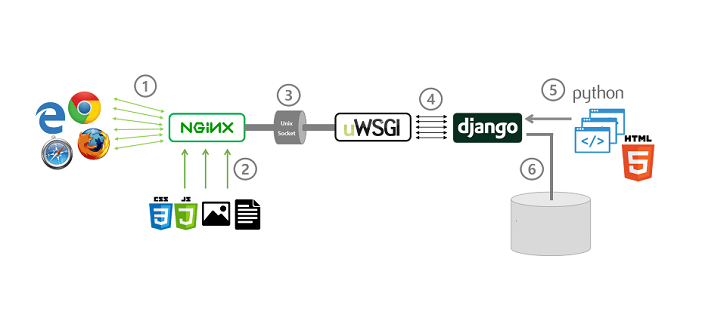

__Nginx__ может использоваться как __обратный прокси-сервер__ - тип прокси-сервера, который ретранслирует запросы клиентов из внешней сети на один или несколько серверов, логически расположенных во внутренней сети.<br></br>
__Nginx__ будет принимать __HTTP__ запросы от клиента (браузера) и направлять их на сервер __uWsgi__ или __Gunicorn__. <br></br>
__Сервер WSGI__ создает динамический контент, выполняя Python код.<br></br>
Далее __сервер WSGI__ возвращает ответ формата __HTML, JSON или XML__, а обратный прокси-сервер __Nginx__ отправляет его клиенту.<br></br>
Также __Nginx__ будет работать в качестве веб-сервера для предоставления статических ресурсов, таких как изображения, CSS-стили и JavaScript-файлов.

## Deploy

###  Первоначальная настройка сервера

Подготовка сервера под управлением __Ubuntu 20.x__ к деплою веб-приложения включает в себя несколько ключевых шагов, которые обеспечивают безопасность и оптимальную настройку сервера.

#### Обновление системы

Сразу после доступа к серверу выполните обновление всех пакетов, чтобы убедиться, что у вас установлены последние версии софта и исправления безопасности.

In [ ]:
sudo apt update && sudo apt upgrade

#### Создание нового пользователя

По соображениям безопасности рекомендуется создать нового пользователя с привилегиями __sudo__ и использовать его вместо __root__.

In [ ]:
sudo adduser username
sudo usermod -aG sudo username
su - username

###  Установка необходимого ПО

Установим все необходимые пакеты.

In [ ]:
sudo apt install python3-pip python3-dev libpq-dev postgresql postgresql-contrib nginx curl git

###  Копирование проекта

Перед копированием может быть полезно сжать ваш проект в архив. Это сократит время передачи. Например, если ваш проект находится в директории __myproject__, вы можете использовать команду __tar__ для создания архива:

In [ ]:
tar -czvf myproject.tar.gz /path/to/myproject

Эта команда создаст сжатый архив __myproject.tar.gz__.

Чтобы скопировать файл на сервер, используйте команду scp вместе с путем к архиву и целевым местоположением на сервере. Например:

In [ ]:
scp /path/to/myproject.tar.gz username@server_ip:/path/to/destination

Здесь:

   * __/path/to/myproject.tar.gz__ - путь к архиву на вашем локальном компьютере.
   * __username__ - ваше имя пользователя на сервере.
   * __server_ip__ - IP-адрес сервера.
   * __/path/to/destination__ - путь на сервере, куда вы хотите скопировать архив.

После копирования архива на сервер, войдите на сервер через SSH:

In [ ]:
ssh username@server_ip

Перейдите в директорию, куда был скопирован архив, и распакуйте его:

In [ ]:
cd /path/to/destination
tar -xzvf myproject.tar.gz

Другим вариантом копирования проекта является клонирование из __github/gitlab__:

In [ ]:
cd /path/to/destination
mkdir myproject
cd myproject
git clone https://github.com/username/myproject.git

###  Настройка Базы Данных

Базы данных являются ключевой частью большинства веб-проектов. Вы можете выбрать между __SQL__ (например, PostgreSQL, MySQL) и __NoSQL__ (например, MongoDB) базами данных в зависимости от проекта.<br></br>
Django из коробки предлагает хранить данные в __SQLite__. __SQLite__ — это быстрая и легкая встраиваемая однофайловая СУБД, которая позволяет хранить базу локально на одном устройстве. Для работы __SQLite__ не нужны сторонние библиотеки или службы.

SQLite прекрасно подходит для легких приложений, прототипов, встраиваемых систем и сценариев, где не требуется высокая производительность и масштабируемость. Однако для боевых веб-приложений, особенно тех, которые предполагают обработку большого количества транзакций или одновременный доступ множества пользователей, лучше выбрать более мощную СУБД, такую как __PostgreSQL__.

__PostgreSQL__ -  более мощная и более гибкая СУБД.<br></br>
По умолчанию __PostgreSQL__ использует для локальных соединений одноранговую аутентификацию. То есть, имя пользователя операционной системы совпадает с именем пользователя Postgres, соответственно этот пользователь может войти без аутентификации.<br></br>
Во время установки Postgres можно создать пользователя операционной системы, например, __postgres__, который будет являться пользователем-администратором в СУБД. Этого пользователя необходимо использовать для выполнения административных задач.

__Настройка пользователя и базы данных:__

In [ ]:
sudo -u postgres createuser --interactive
sudo -u postgres createdb mydatabase

__Настройка пароля и прав доступа:__

In [ ]:
sudo -u postgres psql

Нам открывается командная строка базы данных для настройки. В SQL-командной строке:

In [ ]:
ALTER USER myuser WITH ENCRYPTED PASSWORD 'mypassword';
GRANT ALL PRIVILEGES ON DATABASE mydatabase TO myuser;

Выходим из командной строки:

In [ ]:
\q

###  Настройка проекта

Запускаем виртуальное окружение(если его нет, то создаем командой ниже)

In [ ]:
# Создание виртуального окружения
sudo apt install python3-venv
python3 venv -v venv

In [ ]:
source venv/bin/activate

Установим необходимые пакеты:

In [ ]:
pip install django gunicorn uwsgi psycopg2-binary

Выходим из виртуального окружения:

In [ ]:
deactivate

Далее прописываем необходимые настройки проекта в файле __settings.py__ проекта.

Изменим __ALLOWED_HOSTS__:

In [ ]:
ALLOWED_HOSTS = ['your_server_domain_or_IP', 'second_domain_or_IP',...,
                 'localhost']

В настройках базы данных указываем __Postgres__:

In [ ]:
DATABASES = {
    'default': {
        'ENGINE': 'django.db.backends.postgresql_psycopg2',
        'NAME': 'mydatabase',
        'USER': 'myuser',
        'PASSWORD': 'mypassword',
        'HOST': 'localhost',
        'PORT': '',
    }
}

Необходимо указать имя базы данных, имя только что созданного пользователя базы данных, пароль пользователя базы данных и указать, что базу данных можно найти на локальном компьютере (так как бд находится на том же сервере, что и проект). Вы можете оставить настройку PORT пустой.

Прописываем настройки статических файлов, для того, чтобы Nginx мог обрабатывать запросы на получение статических файлов.

In [ ]:
STATIC_URL = '/static/’
STATIC_ROOT = os.path.join(BASE_DIR, 'staticfiles/')
STATICFILES_DIRS = [os.path.join(BASE_DIR, "static"),]

   * __STATIC_ROOT__: Абсолютный путь к каталогу, в котором будут собираться статические файлы во время деплоя проекта. 
   * __STATIC_URL__: Переменная, в которой хранится адрес до статических файлов, в основном используется методом static в шаблонах Django.
   * __STATICFILES_DIRS__: Используется для включения каталогов для поиска статических файлов.

Файлы копируются в STATIC_ROOT командой:

In [ ]:
python manage.py collectstatic

Применяем миграции:

In [ ]:
python manage.py makemigrations
python manage.py migrate

Создаем администратора проекта:

In [ ]:
python manage.py createsuperuser

Собираем все статические файлы в настроенном каталоге, выполнив следующую команду:

In [ ]:
python manage.py collectstatic

Чтобы протестировать сервер разработки, необходимо разрешить доступ к порту, который будем использовать. В этом случае создаем исключение для порта 8000:

In [ ]:
sudo ufw allow 8000

Протестируем проект, запустив сервер разработки Django с помощью следующей команды:

In [ ]:
python manage.py runserver 0.0.0.0:8000

Откройте браузер на компьютере и проверьте доступность вашего проекта
http://server_domain_or_IP:8000

###  Настройка Gunicorn

В каталогe __/etc/systemd/system/__ создаем файл __gunicorn.socket__:

In [ ]:
cd /etc/systemd/system/
sudo nano /etc/systemd/system/gunicorn.socket

Вставляем следующие строки в файл __gunicorn.socket__:

In [ ]:
[Unit]
Description=gunicorn socket

[Socket]
ListenStream=/run/gunicorn.sock

[Install]
WantedBy=sockets.target

   * __[Unit]__ для описания сокета,
   * __[Socket]__ для определения местоположения сокета
   * __[Install]__ чтобы убедиться, что сокет создан в нужное время

В каталогe __/etc/systemd/system/__ создаем файл __gunicorn.service__:

In [ ]:
sudo nano /etc/systemd/system/gunicorn.service

Вставляем следующие строки в файл __gunicorn.service__

In [ ]:
[Unit]
Description=gunicorn daemon
After=network.target

[Service]
User=username
Group=www-data
WorkingDirectory=/home/username/myproject
ExecStart=/home/username/myproject/venv/bin/gunicorn --workers 3 --bind unix:/home/username/myproject/myproject.sock myproject.wsgi:application

[Install]
WantedBy=multi-user.target

   * __[Unit]__ указывает метаданные и зависимости.
      * Добавляем сюда описание службы и указываем системе инициализации, чтобы она запускала эту службу только после достижения сетевой цели.
   * __[Service]__ указывает пользователя и группу, под которыми будет запускаться процесс.
      * Указываем, что обычная учетная запись пользователя является владельцем процесса, поскольку ему принадлежат все соответствующие файлы.
      * Определяем рабочий каталог и указываем команду, которой будет запускаться служба. В этом случае указываем полный путь к исполняемому файлу Gunicorn, который установлен в виртуальной среде.
      * Привязываем процесс к сокету Unix, который создался в каталоге /run, чтобы процесс мог взаимодействовать с Nginx. Здесь также можем указать любые дополнительные настройки Gunicorn. Для нашего примера мы указали 3 рабочих процесса
   * __[Install]__ сообщает systemd, с чем связать эту службу, если включен ее запуск при загрузке.
      * Укажем, чтобы эта служба запускалась при запуске и работе обычной многопользовательской системы.

###  Запуск Gunicorn

Активируйте и запустите службу:

In [ ]:
sudo systemctl start gunicorn
sudo systemctl enable gunicorn

### Настройка uWSGI

Для запуска приложения с __uWSGI__, необходимо настроить несколько параметров. Это можно сделать либо через командную строку, либо с помощью файла конфигурации (например, __uwsgi.ini__).

Пример запуска uWSGI через командную строку для Django-приложения:

In [ ]:
uwsgi --http :8000 --module myproject.wsgi

Здесь __myproject.wsgi__ - это Python-модуль WSGI Django-приложения.

#### Использование файла конфигурации uWSGI

Создайте файл __uwsgi.ini__ с базовой конфигурацией:

In [ ]:
[uwsgi]
# имя модуля WSGI
module = myproject.wsgi

# полный путь к директории Django-проекта
chdir = /path/to/your/project

# протокол и порт для прослушивания
http = :8000

# количество процессов и потоков
processes = 4
threads = 2

# файл для PID процесса
pidfile = /path/to/your/project/uwsgi.pid

# лог файл
daemonize = /path/to/your/project/uwsgi.log

###  Запуск uWSGI

Запустите uWSGI с этим файлом конфигурации:

In [ ]:
uwsgi --ini uwsgi.ini

### Настройка Nginx

В нашем случае __Nginx__ настраивается как обратный прокси-сервер, для перенаправления запросов на __Gunicorn__, также __Nginx__ будет отдавать статические файлы по запросам.

Создадим файл настройки __Nginx__:

In [ ]:
sudo nano /etc/nginx/sites-available/myproject

Добавим в него следующее:

In [ ]:
server {
    listen 80;
    server_name your_server_ip;

    location /static/ {
        root /home/username/your_project;
    }

    location / {
        include proxy_params;
        proxy_pass http://unix:/run/gunicorn.sock;
    }
}


   * __listen__ определяет порт.
   * __server_name__ задает доменные имена, на которые должен реагировать этот серверный блок.
   * __location /__ определяет корневой URL.
   * __proxy_pass__ перенаправляет запросы на другой сервер (в данном случае __Gunicorn__).
   * __location /static/__ обслуживает статические файлы напрямую из __Nginx__, что повышает производительность.

__Файлы конфигурации Nginx__:

   * __nginx.conf__ - общая конфигурация всего сервера и всех обслуживаемых сайтов.
   * __site-available__ - конфигурации отдельных приложений.
   * __sites-enabled__ - включённые сайты, здесь прописываются символические ссылки файлов конфигурации из __sites-available__ для быстрого включения, переключения или отключения.

### Активация Nginx

Для активации создайте символическую ссылку файла конфигурации из __sites-available__ в __sites-enabled__:

In [ ]:
sudo ln -s /etc/nginx/sites-available/myproject /etc/nginx/sites-enabled

Перед перезагрузкой Nginx рекомендуется проверить конфигурацию на наличие ошибок:

In [ ]:
nginx -t

Если проверка конфигурации прошла успешно, перезагрузите NGINX для применения изменений:

In [ ]:
systemctl reload nginx

Закрываем ранее открытый 8000 порт:

In [ ]:
sudo ufw delete allow 8000

Настраиваем брандмауэр для __Nginx__:

In [ ]:
sudo ufw allow 'Nginx Full'